In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
df = pd.read_csv('housing.csv', encoding='latin1', on_bad_lines='skip')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
df = pd.DataFrame(df)
df = df.drop(['longitude','latitude'],axis=1)

In [5]:
print(df.head())

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  median_house_value ocean_proximity  
0         8.3252            452600.0        NEAR BAY  
1         8.3014            358500.0        NEAR BAY  
2         7.2574            352100.0        NEAR BAY  
3         5.6431            341300.0        NEAR BAY  
4         3.8462            342200.0        NEAR BAY  


In [6]:
#df['ocean_proximity'].replace({'NEAR BAY': 1, 'INLAND': 0,'NEAR OCEAN': 1}, inplace=True)


In [7]:
X = df[['total_rooms', 'total_bedrooms','population','median_income']]
y = df['median_house_value']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Convert MAPE to Percentage
percentage_error = mape * 100

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean Absolute Percentage Error (%):", percentage_error)



Mean Squared Error: 10790840117.057898
R^2 Score: 0.17652883212509884
Mean Absolute Percentage Error (%): 44.22122233017749


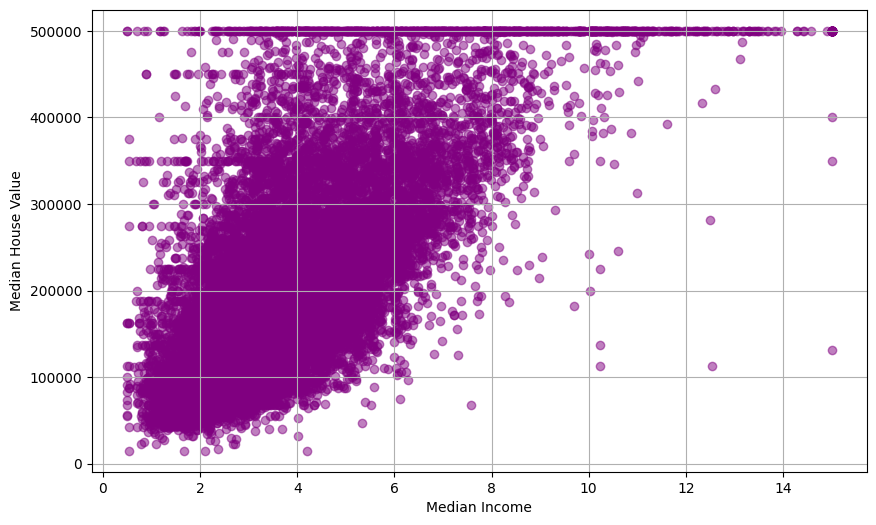

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], color='purple', alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()


In [17]:


class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def _mse(self, y):
        """Calculate Mean Squared Error."""
        return np.mean((y - np.mean(y)) ** 2)

    def _split(self, X, y, feature, threshold):
        """Split dataset based on feature and threshold."""
        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold
        return X[left_idx], X[right_idx], y[left_idx], y[right_idx]

    def _find_best_split(self, X, y):
        """Find the best split for the data."""
        best_feature, best_threshold, best_mse = None, None, float("inf")
        n_samples, n_features = X.shape

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue
                mse_left, mse_right = self._mse(y_left), self._mse(y_right)
                weighted_mse = (len(y_left) * mse_left + len(y_right) * mse_right) / n_samples
                if weighted_mse < best_mse:
                    best_feature, best_threshold, best_mse = feature, threshold, weighted_mse

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        """Recursively build the tree."""
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split or self._mse(y) == 0:
            return np.mean(y)

        feature, threshold = self._find_best_split(X, y)
        if feature is None:
            return np.mean(y)

        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
        return {
            "feature": feature,
            "threshold": threshold,
            "left": self._build_tree(X_left, y_left, depth + 1),
            "right": self._build_tree(X_right, y_right, depth + 1),
        }

    def fit(self, X, y):
        """Fit the model to the data."""
        self.tree = self._build_tree(X, y)

    def _predict_sample(self, x, tree):
        """Predict a single sample."""
        if not isinstance(tree, dict):
            return tree
        if x[tree["feature"]] <= tree["threshold"]:
            return self._predict_sample(x, tree["left"])
        return self._predict_sample(x, tree["right"])

    def predict(self, X):
        """Predict for all samples in X."""
        return np.array([self._predict_sample(x, self.tree) for x in X])






X = df[["housing_median_age", "total_rooms", "total_bedrooms", "median_income"]].values
y = df["median_house_value"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeRegressorScratch(max_depth=3)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Convert MAPE to Percentage
percentage_error = mape * 100

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean Absolute Percentage Error (%):", percentage_error)
print("Percentage Accuracy (%):", 100-percentage_error)

Mean Squared Error: 6947553076.147321
R^2 Score: 0.4698179582473745
Mean Absolute Percentage Error (%): 39.26315765973798
Percentage Accuracy (%): 60.73684234026202


In [11]:
#decision tree for classification problems
db = pd.read_csv('diabetes.csv')
print(db.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def _gini(self, y):
        """Calculate Gini Impurity."""
        unique_classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _split(self, X, y, feature, threshold):
        """Split dataset based on feature and threshold."""
        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold
        return X[left_idx], X[right_idx], y[left_idx], y[right_idx]

    def _find_best_split(self, X, y):
        """Find the best split for the data."""
        best_feature, best_threshold, best_gini = None, None, float("inf")
        n_samples, n_features = X.shape

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue
                gini_left, gini_right = self._gini(y_left), self._gini(y_right)
                weighted_gini = (len(y_left) * gini_left + len(y_right) * gini_right) / n_samples
                if weighted_gini < best_gini:
                    best_feature, best_threshold, best_gini = feature, threshold, weighted_gini

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        """Recursively build the tree."""
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        # Stop conditions
        if depth >= self.max_depth or n_samples < self.min_samples_split or len(unique_classes) == 1:
            return {"class": np.bincount(y).argmax()}

        # Find the best split
        feature, threshold = self._find_best_split(X, y)
        if feature is None:
            return {"class": np.bincount(y).argmax()}

        # Split data
        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)

        # Recursively build subtrees
        return {
            "feature": feature,
            "threshold": threshold,
            "left": self._build_tree(X_left, y_left, depth + 1),
            "right": self._build_tree(X_right, y_right, depth + 1),
        }

    def fit(self, X, y):
        """Fit the model to the data."""
        self.tree = self._build_tree(X, y)

    def _predict_sample(self, x, tree):
        """Predict a single sample."""
        if "class" in tree:
            return tree["class"]
        if x[tree["feature"]] <= tree["threshold"]:
            return self._predict_sample(x, tree["left"])
        return self._predict_sample(x, tree["right"])

    def predict(self, X):
        """Predict for all samples in X."""
        return np.array([self._predict_sample(x, self.tree) for x in X])


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dataset preparation
X = db[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
        "DiabetesPedigreeFunction", "Age"]].values
y = db["Outcome"].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifierScratch model
model = DecisionTreeClassifierScratch(max_depth=3)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy (%):", accuracy * 100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy (%): 75.97402597402598
Confusion Matrix:
 [[83 16]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

